In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('brooklyn.csv')

In [3]:
df.head(10)

,id,date_collected,retailer_type,retailer_detail,food_type,food_detail,label_type,label_language,label_date,approximate_dollar_value,image_id,collection_lat,collection_long,label_explanation
0,5e31d5503b85a2e63d634187,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic oatmeal,sticker,use by,2020-01-28,5.25,IMG_1872,40.69453,-73.99447,NaN
1,5e31d5643b85a2e63d634188,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic oatmeal,sticker,use by,2020-01-28,5.25,IMG_1873,40.69453,-73.99447,NaN
2,5e31d8903b85a2e63d634189,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic middle eastern salad,sticker,use by,2020-01-28,10.00,IMG_1874,40.69453,-73.99447,NaN
3,5e31dcee3b85a2e63d63418a,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic oatmeal,sticker,use by,2020-01-28,6.25,IMG_1875,40.69453,-73.99447,NaN
4,5e31dd273b85a2e63d63418b,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic mexican salad,sticker,use by,2020-01-28,10.00,IMG_1876,40.69453,-73.99447,NaN
5,5e31dda03b85a2e63d63418c,2020-01-27,counter service,ready-to-eat and prepackaged health food,packaged,organic energy bar,sticker,12619,2020-01-30,3.50,IMG_1877,40.69453,-73.99447,NaN
6,5e31ddb33b85a2e63d63418d,2020-01-27,counter service,ready-to-eat and prepackaged health food,packaged,organic energy bar,sticker,12619,2020-01-30,3.50,IMG_1879,40.69453,-73.99447,NaN
7,5e31ddd23b85a2e63d63418e,2020-01-27,counter service,ready-to-eat and prepackaged health food,packaged,organic energy bar,sticker,12619,2020-01-30,3.50,IMG_1880,40.69453,-73.99447,NaN
8,5e31dde13b85a2e63d63418f,2020-01-27,counter service,ready-to-eat and prepackaged health food,packaged,organic energy bar,sticker,12619,2020-01-30,3.50,IMG_1881,40.69453,-73.99447,NaN
9,5e442b00c435958777371fc6,2020-02-11,health food grocer,"ready-to-eat, shelf-stable, frozen, and perish...",perishable,yogurt,package printed,NaN,2020-02-11,3.99,IMG_1897,40.69335,-73.99150,NaN


In [4]:
df[['date_collected','label_date']] = df[['date_collected','label_date']]\
   .apply(pd.to_datetime, errors = 'coerce', format = '%Y-%m-%d')

In [5]:
# calculate time delta between date on label and date item was trashed
# if positive, the item was trashed before the label date indicated
df['label_collect_difference'] = df['label_date'] - df['date_collected']
df.label_collect_difference.fillna(pd.Timedelta('0 days'), inplace=True)
df['label_collect_int'] = df.label_collect_difference/pd.Timedelta(days=1)
df.head()

,id,date_collected,retailer_type,retailer_detail,food_type,food_detail,label_type,label_language,label_date,approximate_dollar_value,image_id,collection_lat,collection_long,label_explanation,label_collect_difference,label_collect_int
0,5e31d5503b85a2e63d634187,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic oatmeal,sticker,use by,2020-01-28,5.25,IMG_1872,40.69453,-73.99447,NaN,1 days,1.0
1,5e31d5643b85a2e63d634188,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic oatmeal,sticker,use by,2020-01-28,5.25,IMG_1873,40.69453,-73.99447,NaN,1 days,1.0
2,5e31d8903b85a2e63d634189,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic middle eastern salad,sticker,use by,2020-01-28,10.00,IMG_1874,40.69453,-73.99447,NaN,1 days,1.0
3,5e31dcee3b85a2e63d63418a,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic oatmeal,sticker,use by,2020-01-28,6.25,IMG_1875,40.69453,-73.99447,NaN,1 days,1.0
4,5e31dd273b85a2e63d63418b,2020-01-27,counter service,ready-to-eat and prepackaged health food,ready-to-eat,organic mexican salad,sticker,use by,2020-01-28,10.00,IMG_1876,40.69453,-73.99447,NaN,1 days,1.0


In [6]:

labels_col = df.groupby('label_language').label_collect_difference\
.agg(counts = 'count', mean_time_diff = lambda group: group.sort_values()\
.diff().mean())
labels_col.mean_time_diff.fillna(pd.Timedelta('0 days'), inplace=True)
labels_col

,counts,mean_time_diff
label_language,,
12619,4,0 days 00:00:00
bb,2,161 days 00:00:00
best by,10,103 days 16:00:00
best if used by,6,34 days 14:24:00
best used by,1,0 days 00:00:00
by,1,0 days 00:00:00
enjoy by,1,0 days 00:00:00
exp,16,34 days 06:24:00
expires,1,0 days 00:00:00


In [8]:
# prep z-scaled time delta data for visualization
labels_col.mean_time_diff.fillna(pd.Timedelta('0 days'), inplace=True)
labels_col['mean_time_delta'] = labels_col.mean_time_diff/pd.Timedelta(days=1)
labels_col['mean_time_delta'] = (labels_col['mean_time_delta'] - labels_col['mean_time_delta'].mean()) / labels_col['mean_time_delta'].std()
labels_col.head()

,counts,mean_time_diff,mean_time_delta
label_language,,,
12619,4,0 days 00:00:00,-0.445994
bb,2,161 days 00:00:00,3.139644
best by,10,103 days 16:00:00,1.862771
best if used by,6,34 days 14:24:00,0.324584
best used by,1,0 days 00:00:00,-0.445994


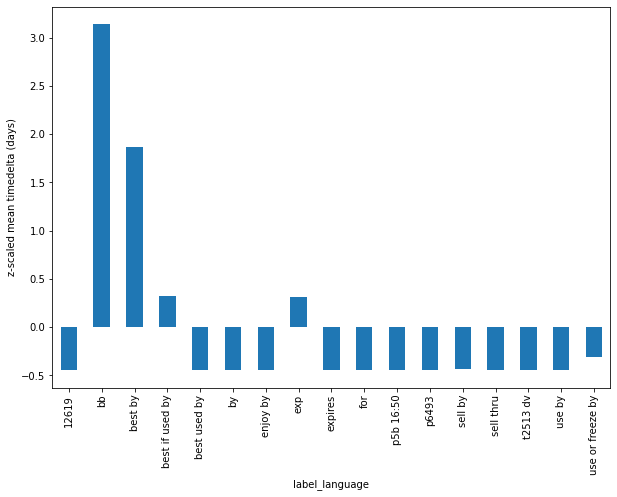

In [22]:
set_axis = labels_col.mean_time_delta.plot.bar(figsize=(10,7))
set_axis.set_ylabel('z-scaled mean timedelta (days)');

In [12]:
df['label_type'].value_counts()


package printed    103
sticker             68
Name: label_type, dtype: int64

In [11]:
df['food_type'].value_counts()

perishable      102
packaged         49
ready-to-eat     16
shelf stable      4
Name: food_type, dtype: int64

In [13]:
df['time_elapsed'] = df['label_date']-df['date_collected']
df.time_elapsed.fillna('0 days', inplace=True)
df['time_delta'] = df.time_elapsed/pd.Timedelta(days=1)
df['time_delta'] = df['time_delta'].astype(int)

In [14]:
graph_food_type = df.groupby('food_type')['time_delta'].mean()

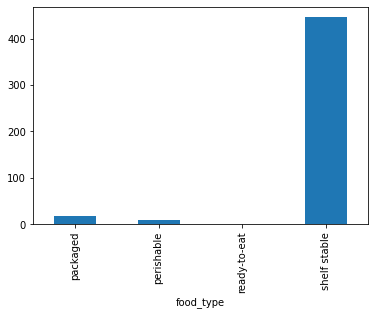

In [15]:
graph_food_type.plot.bar()

plt.show()

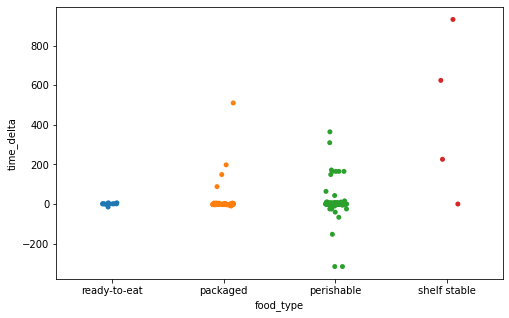

In [16]:
plt.figure(figsize=(8, 5))
# plt.scatter(x=df['food_type'], y=df['time_delta'])
sns.stripplot(x=df['food_type'], y=df['time_delta'])

In [17]:
from sklearn.feature_selection import mutual_info_regression

# Define a function to calculate the MI scores of features
def calculate_mi_scores(X, y):
    miScores = mutual_info_regression(X, y)
    miScores = pd.Series(miScores, name="MI Scores", index=X.columns)
    miScores = miScores.sort_values(ascending=False)
    return miScores

In [18]:
def mi_scores_graph(Mscores):
    Mscores = Mscores.sort_values(ascending=True)
    breadth = np.arange(len(Mscores))
    ticks = list(Mscores.index)
    plt.barh(breadth, Mscores)
    plt.yticks(breadth, ticks)
    plt.title("Mutual Information Scores")

In [19]:
x_axis = df.copy()
y_axis = x_axis.pop('time_delta')

for column in x_axis.select_dtypes("object"):
    x_axis[column], _ = x_axis[column].factorize()

In [20]:
attributes = ['retailer_type','food_type','collection_lat','collection_long']
calc_mi_scores = calculate_mi_scores(x_axis[attributes],y_axis)

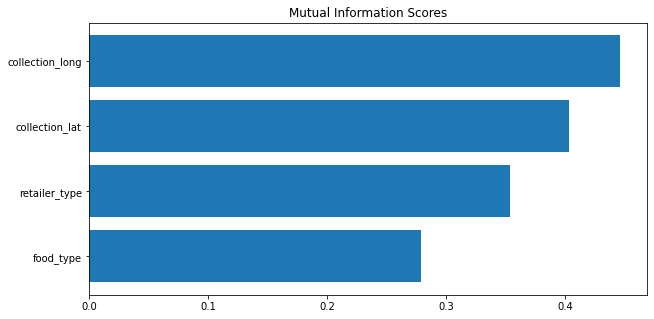

In [21]:
plt.figure(figsize=(10, 5))
mi_scores_graph(calc_mi_scores)